#### World Happiness

#### Background

The country Bhutan made its goal the happiness of the country over the gaol of wealth(Helliwell et al., 2012). The UN General Assembly adopted this goal to measure the happiness of the people and to guide the governance and public policies. But how to measure the happiness of the people? The household income is typically collected as a measurement. The Gross Domestic Product per capita (GDP) reflects the average income of a country's citizen. In an impoverished country a low income means the basic needs such as access to health care, remunerative works, adequate food supplies, education opportunities, proper sanitation, safe water and safe homes were not available. With an increase in income the well-being also improved. But countries with affluence do not report higher well-being in relative to their income. The lifestyles of affluent countries come with their own problems such as psychological disorders (e.g., depression), obesity, diseases related to smoking, addictions (to gambling, TV and shopping), eating disorders (e.g., bulimia), adult-onset diabetes. Even though the development in technology and economy advanced in countries the subjective reported well-being of the people comes up short. So, to get an appropriate measure of people's happiness not only the GDP, but also the other factors were included (Helliwell et al., 2012). 
The world happiness reports are based, among others, on the data from the surveys of Gallup World Poll. 

#### Variables of Interest

* Country: It represents the surveyed country.
* Happiness Rank: It represents the ranking of the country based on the happiness score.
* Happiness Score: The happiness scores represent the subjective well-being based on the surveys from Gallup World Poll to the questionnaire of life evaluations. 
* GDP: The GDP per capita is an index that represents the economic output per person, by calculating the division of a country's GDP by its population.  
* Social Support: It represents the responses to the question whether one has relatives or friends to rely on, when needed.
* Health Life Expectancy: Healthy life expectancy is based on the data repository of the Global Health Observatory from the World Health Organisation (WHO). It   represents the number of disability-free years estimated at birth.
* Freedom to make Life Choices: It represents the average response to the question whether they satisfied or dissatisfied with their freedom to choose what they   want to do with their life.
* Absence of Corruption: It represents the average response of individuals perception on their government's corruption.
* Generostiy: It represents the average response to the question if money was donated to a charity. 

#### Hypotheses

- H1: Are the six independent factors correlated with each other? If they are correlated, can one of the variables be omitted?
- H2: which of the six factors could predict happiness value over the four years from 2015 to 2019.

#### Data Plan Organization

* Data Cleansing and Data Preparation
* Description of the Data Architecture
* Statistical Analyses

#### Data Cleansing and Data Preparation

1. Load datasets from the years 2015 to 2019 (total five datasets)
2. Make subsets only with interested variables: 
    * Happiness Score
    * GDP
    * Support
    * Life
    * Freedom
    * Corruption
    * Generosity
3. Rename variables to common names
4. Round all values to the same decimal points
5. Remove missing data 
6. Add variable 'Year' (for the merged dataset afterwards)
7. Check if all variables have common vector types
8. Remove outliers.
9. Merge the five datasets


#### Data Description

The datasets of the world happiness reports were obtain from Kaggle and it contains datasets from year 2015 to 2019. There 155-158 countries listed and includes 9 to 12 variables. 

#### Statistical Analyses

1. Summary table of merged dataset
2. Visual distribution of the variables
3. Test for collinearity 
4. Multiple linear regression
5. Stepwise regression
6. Bootstrap

#### Data Cleansing/Preperation

In [1]:
library(tidyverse)
library(readxl)
library(dplyr)
library(ggpubr)
library(car)
library(rstatix)
library(ggthemes)
library(ggplot2)
library(lattice)
library(devtools)
library(DescTools)
library(caret)
library(boot)
library(psych)
library(gridExtra)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some



Attaching package: 'rstatix'


The following object is masked from 'package:stats':

    filter


Loading required package: usethis


Attaching package: 'DescTools'


The following object is masked from 'package:car':

    Recode



Attaching package: 'caret'


The following objects are masked from 'package:DescTools':

    MAE, RMSE




In [2]:
whr15 <-read.csv('2015.csv')
whr16 <-read.csv('2016.csv')
whr17 <-read.csv('2017.csv')
whr18 <-read.csv('2018.csv')
whr19 <-read.csv('2019.csv')

In [3]:
names(whr15)
names(whr16)
names(whr17)
names(whr18)
names(whr19)

[1] "Country"                       "Region"                       
 [3] "Happiness.Rank"                "Happiness.Score"              
 [5] "Standard.Error"                "Economy..GDP.per.Capita."     
 [7] "Family"                        "Health..Life.Expectancy."     
 [9] "Freedom"                       "Trust..Government.Corruption."
[11] "Generosity"                    "Dystopia.Residual"

[1] "Country"                       "Region"                       
 [3] "Happiness.Rank"                "Happiness.Score"              
 [5] "Lower.Confidence.Interval"     "Upper.Confidence.Interval"    
 [7] "Economy..GDP.per.Capita."      "Family"                       
 [9] "Health..Life.Expectancy."      "Freedom"                      
[11] "Trust..Government.Corruption." "Generosity"                   
[13] "Dystopia.Residual"

[1] "Country"                       "Happiness.Rank"               
 [3] "Happiness.Score"               "Whisker.high"                 
 [5] "Whisker.low"                   "Economy..GDP.per.Capita."     
 [7] "Family"                        "Health..Life.Expectancy."     
 [9] "Freedom"                       "Generosity"                   
[11] "Trust..Government.Corruption." "Dystopia.Residual"

[1] "Overall.rank"                 "Country.or.region"           
[3] "Score"                        "GDP.per.capita"              
[5] "Social.support"               "Healthy.life.expectancy"     
[7] "Freedom.to.make.life.choices" "Generosity"                  
[9] "Perceptions.of.corruption"

[1] "Overall.rank"                 "Country.or.region"           
[3] "Score"                        "GDP.per.capita"              
[5] "Social.support"               "Healthy.life.expectancy"     
[7] "Freedom.to.make.life.choices" "Generosity"                  
[9] "Perceptions.of.corruption"

In [4]:
dim(whr15)
dim(whr16)
dim(whr17)
dim(whr18)
dim(whr19)

[1] 158  12

[1] 157  13

[1] 155  12

[1] 156   9

[1] 156   9

In [5]:
head(whr15)
head(whr16)
head(whr17)
head(whr18)
head(whr19)

,Country,Region,Happiness.Rank,Happiness.Score,Standard.Error,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


,Country,Region,Happiness.Rank,Happiness.Score,Lower.Confidence.Interval,Upper.Confidence.Interval,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
2,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
3,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
4,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
5,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
6,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,2.277027
2,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701,2.313707
3,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266,2.322715
4,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.8581313,0.6200706,0.2905493,0.3670073,2.276716
5,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.8091577,0.6179509,0.2454828,0.3826115,2.430182
6,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.8106961,0.5853845,0.4704898,0.2826618,2.294804


,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
2,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
3,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
4,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
5,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
6,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295


,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [6]:
#Filter columns 
whr15 <-subset(whr15, select=c('Country','Happiness.Rank','Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.','Freedom',
                               'Trust..Government.Corruption.','Generosity'))
whr16 <-subset(whr16, select=c('Country','Happiness.Rank','Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.','Freedom',
                               'Trust..Government.Corruption.','Generosity'))
whr17 <-subset(whr17, select=c('Country','Happiness.Rank','Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.','Freedom',
                               'Trust..Government.Corruption.','Generosity'))
whr18 <-subset(whr18, select=c('Country.or.region','Overall.rank','Score','GDP.per.capita','Social.support','Healthy.life.expectancy','Freedom.to.make.life.choices',
                               'Perceptions.of.corruption','Generosity'))
whr19 <-subset(whr19, select=c('Country.or.region','Overall.rank','Score','GDP.per.capita','Social.support','Healthy.life.expectancy','Freedom.to.make.life.choices',
                               'Perceptions.of.corruption','Generosity'))

In [7]:
#Rename columns to common names
whr15 <-whr15 %>%rename(Rank='Happiness.Rank' ,Score='Happiness.Score',GDP='Economy..GDP.per.Capita.',Support='Family',Life='Health..Life.Expectancy.',
                               Corruption='Trust..Government.Corruption.')
whr16 <-whr16 %>%rename(Rank='Happiness.Rank' ,Score='Happiness.Score',GDP='Economy..GDP.per.Capita.',Support='Family',Life='Health..Life.Expectancy.',
                               Corruption='Trust..Government.Corruption.')
whr17 <-whr17 %>%rename(Rank='Happiness.Rank' ,Score='Happiness.Score',GDP='Economy..GDP.per.Capita.',Support='Family',Life='Health..Life.Expectancy.',
                               Corruption='Trust..Government.Corruption.')
whr18 <-whr18 %>%rename(Country='Country.or.region',Rank='Overall.rank' ,GDP='GDP.per.capita',Support='Social.support',Life='Healthy.life.expectancy',
                               Freedom='Freedom.to.make.life.choices',Corruption='Perceptions.of.corruption')
whr19 <-whr19 %>%rename(Country='Country.or.region',Rank='Overall.rank' ,GDP='GDP.per.capita',Support='Social.support',Life='Healthy.life.expectancy',
                               Freedom='Freedom.to.make.life.choices',Corruption='Perceptions.of.corruption')

In [8]:
#Round the values to the same decimal points
whr15 <-whr15 %>% mutate(GDP = round(GDP,3), Support = round(Support,3), Life = round(Life,3), Freedom = round(Freedom,3), Corruption = round(Corruption,3), 
                         Generosity = round(Generosity,3))
whr16 <-whr16 %>% mutate(GDP = round(GDP,3), Support = round(Support,3), Life = round(Life,3), Freedom = round(Freedom,3), Corruption = round(Corruption,3), 
                         Generosity = round(Generosity,3))
whr17 <-whr17 %>% mutate(GDP = round(GDP,3), Support = round(Support,3), Life = round(Life,3), Freedom = round(Freedom,3), Corruption = round(Corruption,3), 
                         Generosity = round(Generosity,3))

In [9]:
#Remove missing data
whr15 <- na.omit(whr15)
whr16 <- na.omit(whr16)
whr17 <- na.omit(whr17)
whr18 <- na.omit(whr18)
whr19 <- na.omit(whr19)

In [10]:
#New column 'Year'
whr15$Year <-c(2015)
whr16$Year <-c(2016)
whr17$Year <-c(2017)
whr18$Year <-c(2018)
whr19$Year <-c(2019)

In [11]:
#Convert chr to numeric (whr18)
whr18$Corruption <-as.numeric(whr18$Corruption)

Warning message in eval(expr, envir, enclos):
"NAs durch Umwandlung erzeugt"


In [12]:
#Find outliers
out15 <-whr15%>%group_by(Country)%>%identify_outliers(Score)
out15
out16 <-whr16%>%group_by(Country)%>%identify_outliers(Score)
out16
out17 <-whr17%>%group_by(Country)%>%identify_outliers(Score)
out17
out18 <-whr18%>%group_by(Country)%>%identify_outliers(Score)
out18
out19 <-whr19%>%group_by(Country)%>%identify_outliers(Score)
out19

Country,Rank,Score,GDP,Support,Life,Freedom,Corruption,Generosity,Year,is.outlier,is.extreme
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>


Country,Rank,Score,GDP,Support,Life,Freedom,Corruption,Generosity,Year,is.outlier,is.extreme
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>


Country,Rank,Score,GDP,Support,Life,Freedom,Corruption,Generosity,Year,is.outlier,is.extreme
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>


Country,Rank,Score,GDP,Support,Life,Freedom,Corruption,Generosity,Year,is.outlier,is.extreme
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>


Country,Rank,Score,GDP,Support,Life,Freedom,Corruption,Generosity,Year,is.outlier,is.extreme
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>


In [13]:
#Merge datasets
whr <- rbind(whr15, whr16, whr17, whr18, whr19)
whr <-na.omit(whr)

In [14]:
whr$Year <-as.factor(whr$Year)

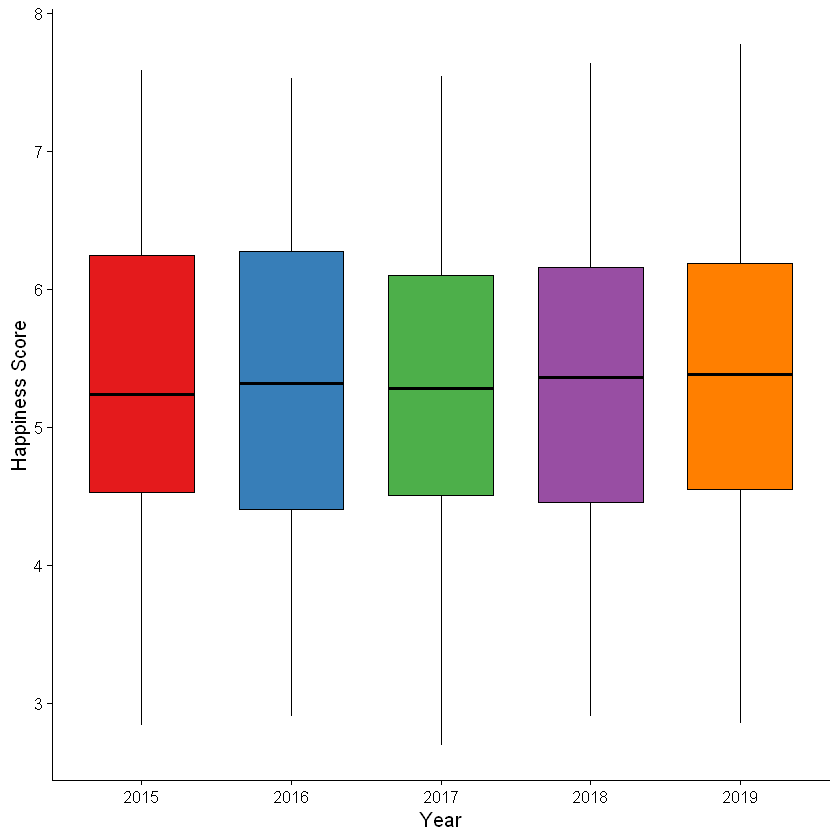

In [15]:
#Plot happiness scores of each year
ggboxplot(whr, x = "Year", y = "Score", 
          fill = "Year", 
          ylab = "Happiness Score", xlab = "Year")+
            scale_fill_brewer(palette='Set1')+
            theme(legend.position = "none")+
    theme(axis.text=element_text(size=10), axis.title=element_text(size=12))

Saving 6.67 x 6.67 in image



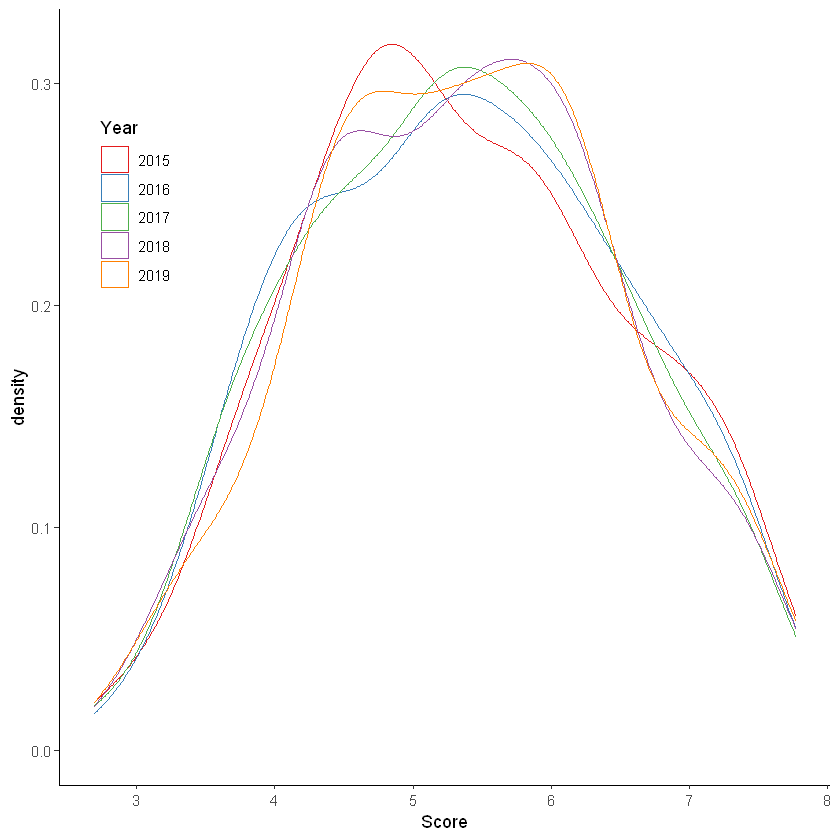

In [16]:
density_score <-ggplot(whr, aes(x=Score, color=Year)) +
                  geom_density()+
                  scale_color_brewer(palette='Set1')+
                  theme_light() + theme_classic()  
density_score <-density_score + theme(legend.position = c(0.1, 0.75))
density_score
ggsave('density_score.png')

#### Summary table

In [17]:
#Summary table
summary(whr)
whr1 <- subset(whr, select = -c(Country, Rank, Year) )
summary_table = round(t(do.call(cbind, lapply(whr1, summary))), digits=3)

#Add Skewness
score = skew(whr1$Score)
gdp = skew(whr1$GDP)
support = skew(whr1$Support)
life = skew(whr1$Life)
freedom = skew(whr1$Freedom)
corruption = skew(whr1$Corruption)
generosity = skew(whr1$Generosity)

skewValues = c(score, gdp, support, life, freedom, 
               corruption, generosity)

summary_table = round(cbind(summary_table, Skew = skewValues), digits=3)
summary_table

   Country               Rank            Score            GDP        
 Length:781         Min.   :  1.00   Min.   :2.693   Min.   :0.0000  
 Class :character   1st Qu.: 40.00   1st Qu.:4.509   1st Qu.:0.6050  
 Mode  :character   Median : 79.00   Median :5.321   Median :0.9820  
                    Mean   : 78.77   Mean   :5.377   Mean   :0.9145  
                    3rd Qu.:118.00   3rd Qu.:6.182   3rd Qu.:1.2340  
                    Max.   :158.00   Max.   :7.769   Max.   :1.8710  
    Support           Life           Freedom         Corruption    
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.870   1st Qu.:0.4400   1st Qu.:0.3100   1st Qu.:0.0540  
 Median :1.125   Median :0.6470   Median :0.4310   Median :0.0910  
 Mean   :1.079   Mean   :0.6123   Mean   :0.4113   Mean   :0.1254  
 3rd Qu.:1.328   3rd Qu.:0.8080   3rd Qu.:0.5310   3rd Qu.:0.1560  
 Max.   :1.644   Max.   :1.1410   Max.   :0.7240   Max.   :0.5520  
   Generosity       Year    
 Min.

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,Skew
Score,2.693,4.509,5.321,5.377,6.182,7.769,0.038
GDP,0.000,0.605,0.982,0.915,1.234,1.871,-0.343
Support,0.000,0.870,1.125,1.079,1.328,1.644,-0.685
Life,0.000,0.440,0.647,0.612,0.808,1.141,-0.498
Freedom,0.000,0.310,0.431,0.411,0.531,0.724,-0.522
Corruption,0.000,0.054,0.091,0.125,0.156,0.552,1.515
Generosity,0.000,0.130,0.202,0.219,0.279,0.838,1.039


#### Visual Distribution of Data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



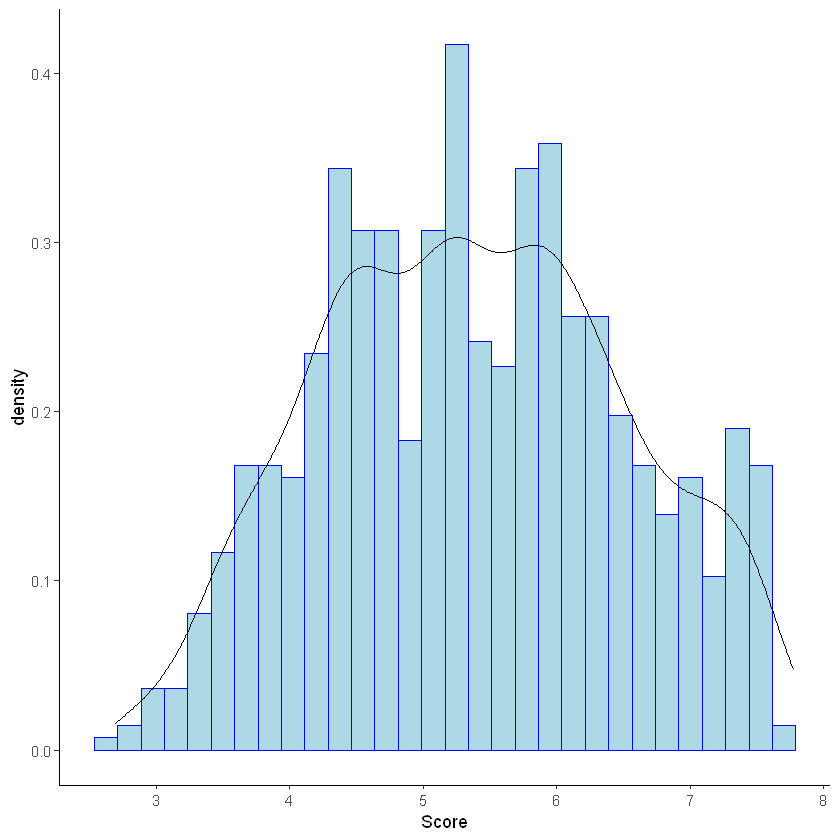

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



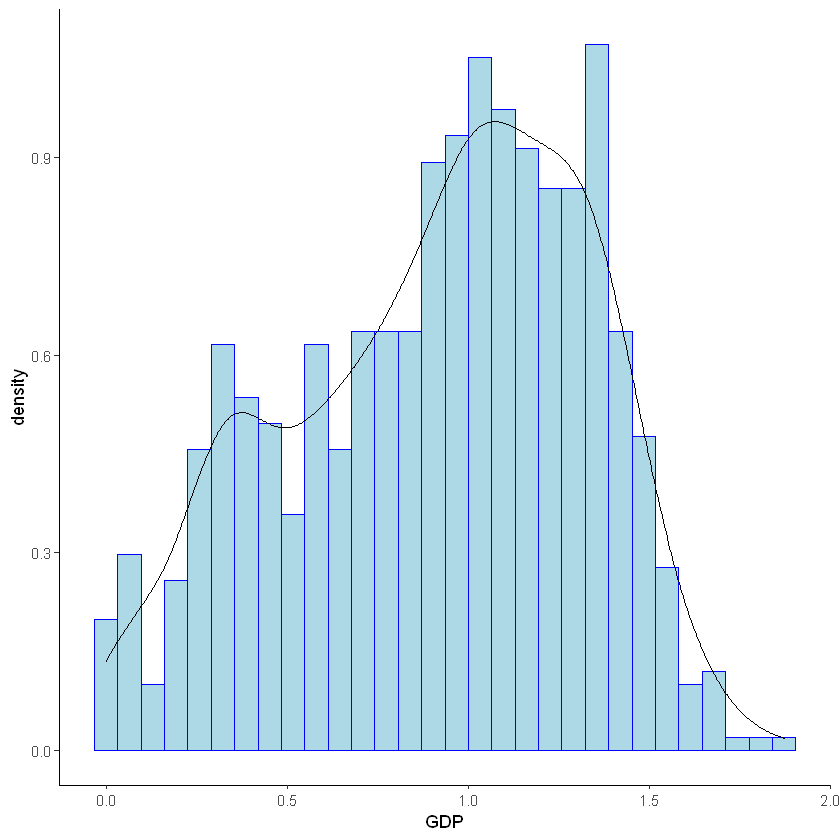

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



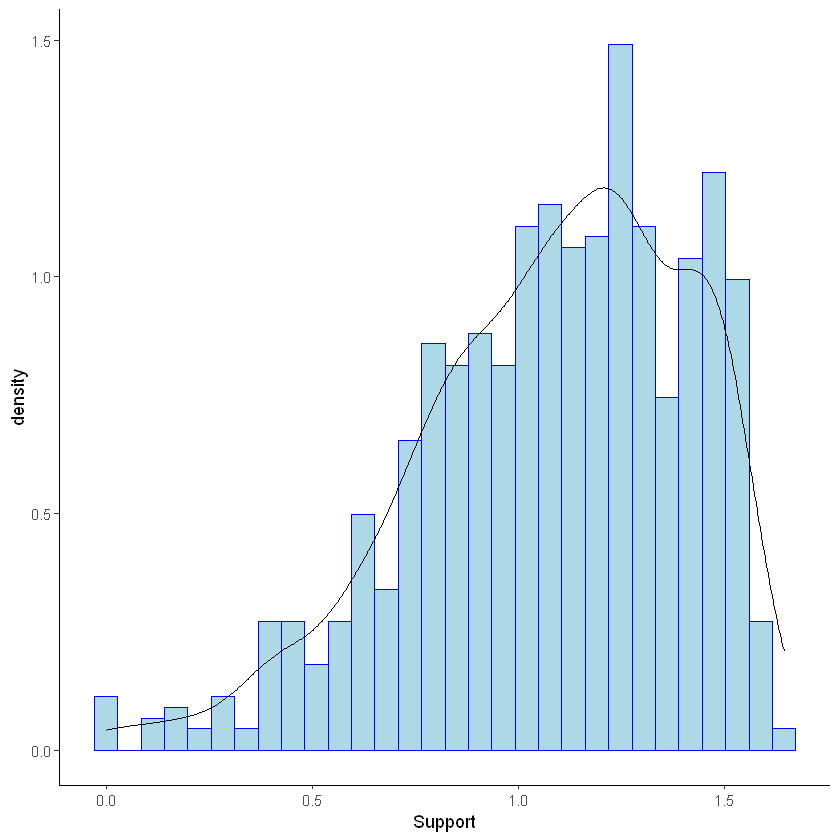

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



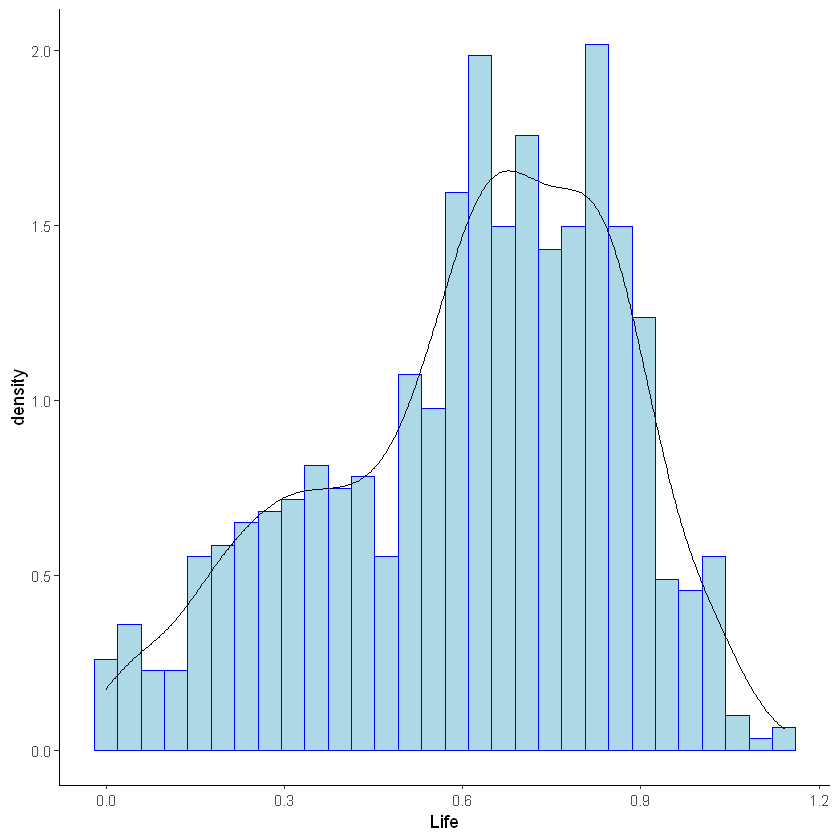

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



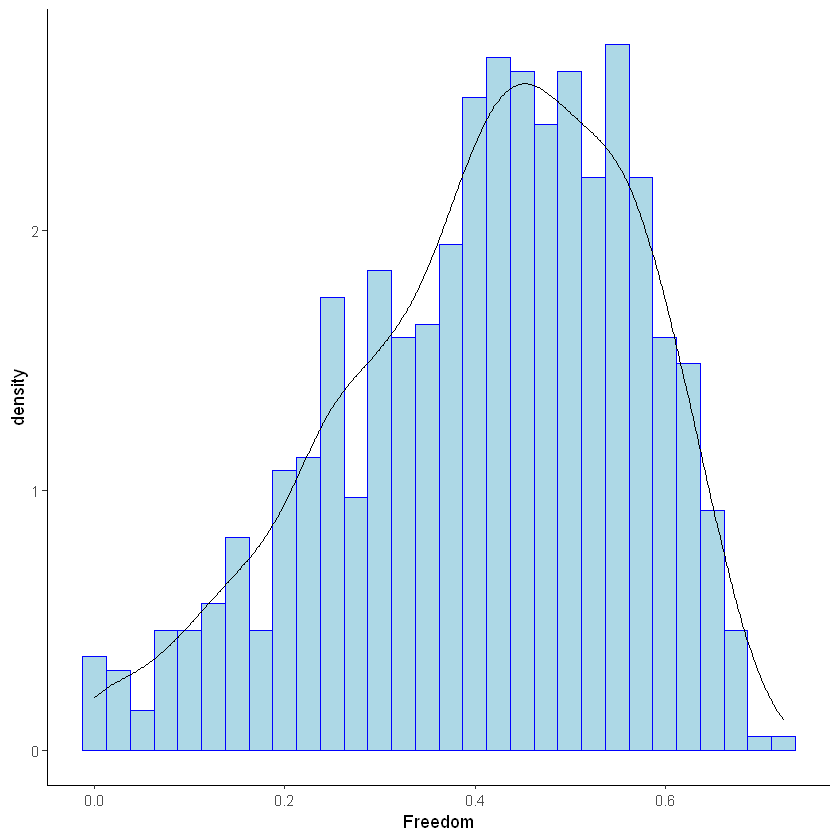

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



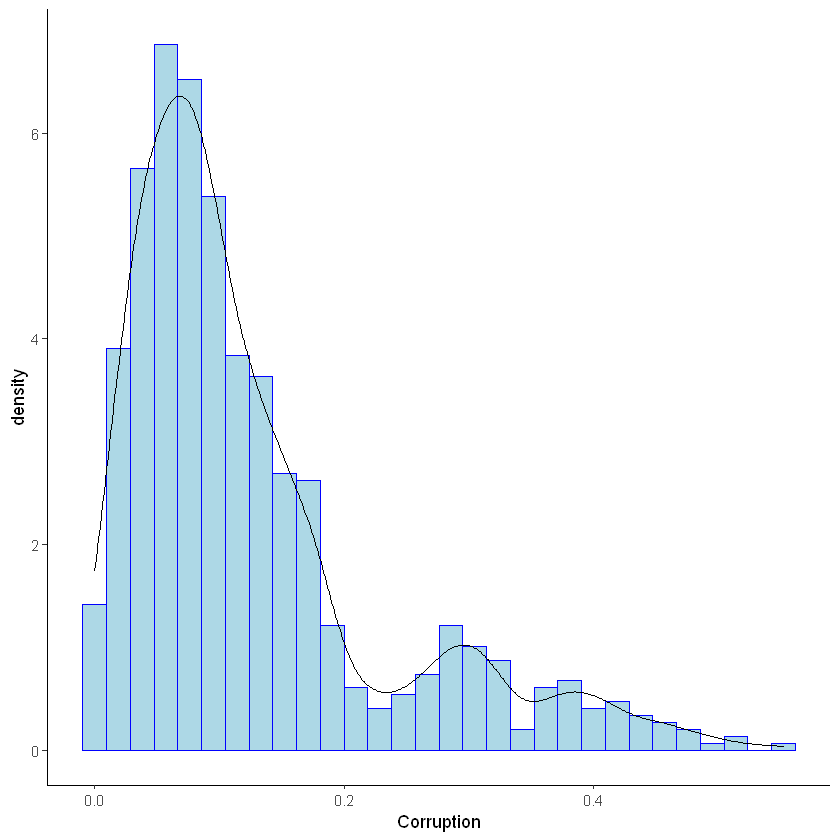

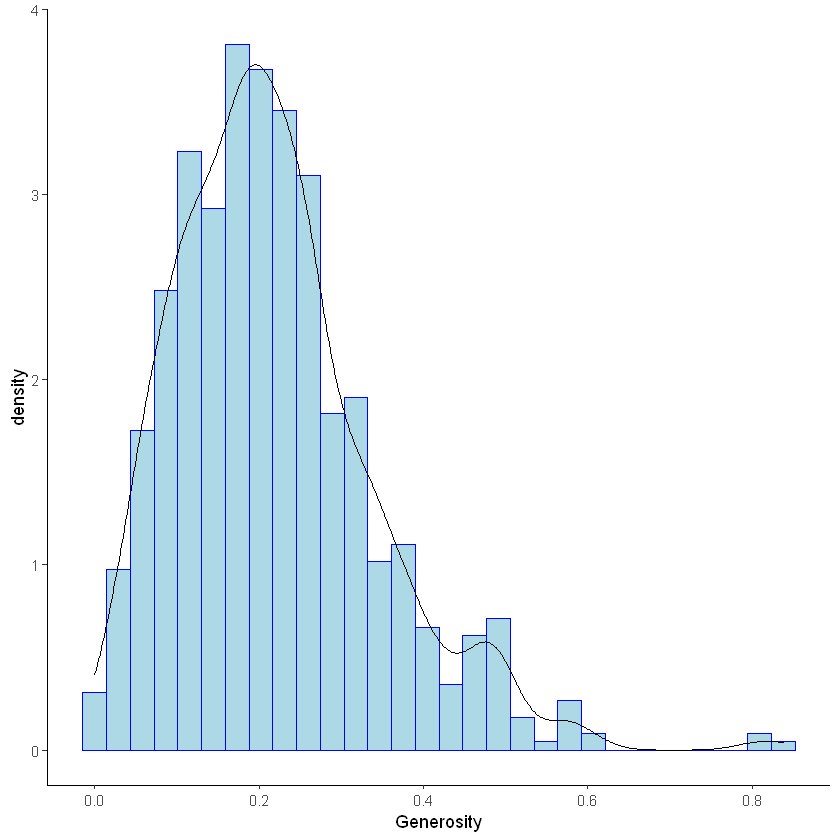

In [18]:
#Visualisation of the variables of interest (Score, GDP, Support, Life, Freedom, Corruption, Generosity)
hist_score<-ggplot(whr, aes(x=Score))  + 
 geom_histogram(aes(y=..density..), colour="blue", fill="lightblue")+
 geom_density()+
 theme_light() + theme_classic() 
hist_score

hist_gdp<-ggplot(whr, aes(x=GDP))  + 
 geom_histogram(aes(y=..density..), colour="blue", fill="lightblue")+
 geom_density()+
 theme_light() + theme_classic() 
hist_gdp

hist_support<-ggplot(whr, aes(x=Support))  + 
 geom_histogram(aes(y=..density..), colour="blue", fill="lightblue")+
 geom_density()+
 theme_light() + theme_classic() 
hist_support

hist_life <-ggplot(whr, aes(x=Life)) + 
 geom_histogram(aes(y=..density..), colour="blue", fill="lightblue")+
 geom_density()+
 theme_light() + theme_classic() 
hist_life

hist_freedom <-ggplot(whr, aes(x=Freedom)) + 
 geom_histogram(aes(y=..density..), colour="blue", fill="lightblue")+
 geom_density()+
 theme_light() + theme_classic() 
hist_freedom

hist_corruption <-ggplot(whr, aes(x=Corruption)) + 
 geom_histogram(aes(y=..density..), colour="blue", fill="lightblue")+
 geom_density()+
 theme_light() + theme_classic() 
hist_corruption

hist_generosity <-ggplot(whr, aes(x=Generosity)) + 
 geom_histogram(aes(y=..density..), colour="blue", fill="lightblue")+
 geom_density()+
 theme_light() + theme_classic() 
hist_generosity

The summary table and the visualisation of the factors showed positiv skewness for Corruption, Generosity. As for Score and Life the values for skeweness were more or less normally distributed. There is a negative skeweness for Support and Freedom. The plot GDP indicated a bimodal distribution. 

#### Test for Collinearity

,GDP,Support,Life,Freedom,Corruption,Generosity
GDP,1.00000000,0.5929201,0.78778950,0.3456253,0.3063080,-0.01373653
Support,0.59292006,1.0000000,0.57327598,0.4197874,0.1264403,-0.03768000
Life,0.78778950,0.5732760,1.00000000,0.3412029,0.2505324,0.01068434
Freedom,0.34562528,0.4197874,0.34120291,1.0000000,0.4596723,0.29049233
Corruption,0.30630799,0.1264403,0.25053239,0.4596723,1.0000000,0.31886108
Generosity,-0.01373653,-0.0376800,0.01068434,0.2904923,0.3188611,1.00000000



Call:
lm(formula = Score ~ GDP + Support + Life + Freedom + Corruption + 
    Generosity, data = whr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92848 -0.32342  0.01838  0.35504  1.66127 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.17505    0.07991  27.219  < 2e-16 ***
GDP          1.13587    0.08415  13.499  < 2e-16 ***
Support      0.64605    0.08092   7.983 5.14e-15 ***
Life         1.01288    0.13203   7.672 5.10e-14 ***
Freedom      1.48055    0.16345   9.058  < 2e-16 ***
Corruption   0.85852    0.22346   3.842 0.000132 ***
Generosity   0.59304    0.17568   3.376 0.000773 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.55 on 774 degrees of freedom
Multiple R-squared:  0.7637,	Adjusted R-squared:  0.7619 
F-statistic:   417 on 6 and 774 DF,  p-value: < 2.2e-16


GDP    Support       Life    Freedom Corruption Generosity 
      3.00       1.83       2.77       1.61       1.44       1.19

GDP    Support       Life    Freedom Corruption Generosity 
      0.33       0.55       0.36       0.62       0.69       0.84

png 
  2

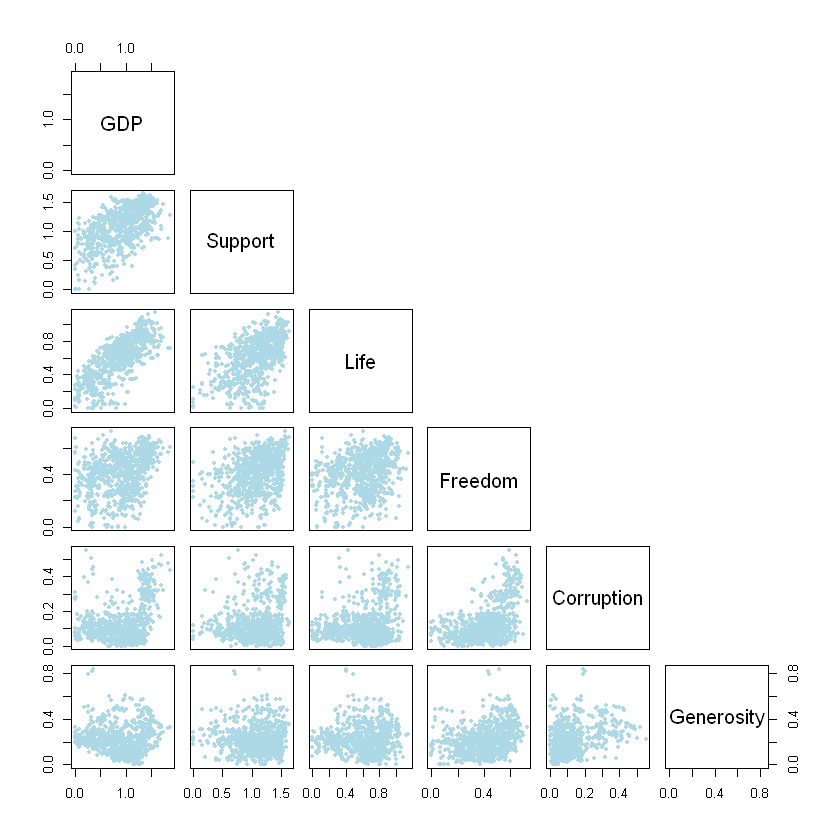

In [19]:
#Collinearity
whr_cor <- subset(whr, select = c(GDP,Support,Life,Freedom,Corruption,Generosity))

#Correlation table
corr_tab <- cor(whr_cor, method = "pearson")
corr_tab

#VIF and Tolerance for mlr
mlr <- lm(Score ~ GDP + Support + Life + Freedom + Corruption + Generosity, data=whr)
summary (mlr)

round(vif(mlr), 2)       # VIF

round(1/vif(mlr), 2)     # Tolerance



#Testing for multicollinearity with a graphic
pairs(~GDP + Support + Life + Freedom + Corruption + Generosity, data=whr, pch = 20, cex=1, col="lightblue",  upper.panel=NULL, cex.labels=1.5)

#Save plot
png('cor_pairs.png')
cor_pairs<-pairs(~GDP + Support + Life + Freedom + Corruption + Generosity, data=whr, pch = 20, cex=1, col="lightblue",  upper.panel=NULL, cex.labels=1.5)
dev.off()

The factors GDP and Life seemed to be highly correlated (r = 0.78). According to the literature values above 10 is an indication for collinearity between the variables (Field et al., 2012). The values of the variance inflation factor for all the variables were far below 10. As for the tolerance statistic, which is related to the variance inflation factor, values below 0.1 are seen as a presence for multicollinearity (Field et al., 2012). This not of concern, since none of the values were below 0.1. 

#### Multiple Linear Regression

In [20]:
mlr <- lm(Score ~ GDP + Support + Life + Freedom + Corruption + Generosity, data=whr)
summary(mlr)


Call:
lm(formula = Score ~ GDP + Support + Life + Freedom + Corruption + 
    Generosity, data = whr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92848 -0.32342  0.01838  0.35504  1.66127 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.17505    0.07991  27.219  < 2e-16 ***
GDP          1.13587    0.08415  13.499  < 2e-16 ***
Support      0.64605    0.08092   7.983 5.14e-15 ***
Life         1.01288    0.13203   7.672 5.10e-14 ***
Freedom      1.48055    0.16345   9.058  < 2e-16 ***
Corruption   0.85852    0.22346   3.842 0.000132 ***
Generosity   0.59304    0.17568   3.376 0.000773 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.55 on 774 degrees of freedom
Multiple R-squared:  0.7637,	Adjusted R-squared:  0.7619 
F-statistic:   417 on 6 and 774 DF,  p-value: < 2.2e-16


In [21]:
summary(mlr)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.1750549,0.07990994,27.218827,5.626749e-115
GDP,1.1358652,0.08414731,13.498532,1.921503e-37
Support,0.6460498,0.08092409,7.983405,5.137676e-15
Life,1.0128829,0.13202526,7.671887,5.099891e-14
Freedom,1.4805502,0.16344709,9.058284,1.063161e-18
Corruption,0.8585249,0.22345530,3.842043,1.320097e-04
Generosity,0.5930444,0.17567606,3.375784,7.727607e-04


In [22]:
#Effect size eta squared
aov <-anova(mlr)
aov
aov[["Sum Sq"]]/sum(aov[["Sum Sq"]]) # η2=.01;small, η2=.06;medium, η2=.14;large (van de Berg, n.d.)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
GDP,1,617.942296,617.9422960,2043.14051,2.476462e-219
Support,1,51.183032,51.1830317,169.22960,3.924525e-35
Life,1,22.552923,22.5529231,74.56811,3.317911e-17
Freedom,1,54.868848,54.8688481,181.41624,2.654852e-37
Corruption,1,6.738025,6.7380251,22.27835,2.799060e-06
Generosity,1,3.446664,3.4466645,11.39592,7.727607e-04
Residuals,774,234.094197,0.3024473,NA,NA


[1] 0.623663797 0.051656933 0.022761740 0.055376876 0.006800412 0.003478577
[7] 0.236261665

All the six factors were significant for predicting happiness score (p<.001). The multiple regression model including all the six factors significantly explained F(6,774) = 417, p < .001 about 76% of the variance (adjusted R = 0.7619) in the happiness score. The effect size eta-squared was calculated for each variable. Eta-squared (η2) equal to .01, .06 and .14 was suggested to represent small, medium and large effects, respectively (van de Berg, n.d.). The value for GDP indicated large effect on the happiness score (η2 = 0.6), followed by the medium effect of Freedom (η2 = 0.06) and the small effects of Support (η2 = 0.05), Life (η2 = 0.02), Corruption (η2 = 0.01) and the effect of Generosity was, η2 < 0.01. 

#### Stepwise Regression

In [23]:
#On individual dataset
step(lm(Score ~ GDP + Support + Life + Freedom + Corruption + Generosity, data=whr15), direction='both')
step(lm(Score ~ GDP + Support + Life + Freedom + Corruption + Generosity, data=whr16), direction='both')
step(lm(Score ~ GDP + Support + Life + Freedom + Corruption + Generosity, data=whr17), direction='both')
step(lm(Score ~ GDP + Support + Life + Freedom + Corruption + Generosity, data=whr18), direction='both')
step(lm(Score ~ GDP + Support + Life + Freedom + Corruption + Generosity, data=whr19), direction='both')

Start:  AIC=-181.49
Score ~ GDP + Support + Life + Freedom + Corruption + Generosity

             Df Sum of Sq    RSS     AIC
- Generosity  1    0.3021 46.150 -182.45
<none>                    45.848 -181.49
- Corruption  1    0.9805 46.829 -180.14
- Life        1    2.8895 48.738 -173.83
- Freedom     1    3.6398 49.488 -171.42
- GDP         1    4.6318 50.480 -168.28
- Support     1   12.1579 58.006 -146.32

Step:  AIC=-182.45
Score ~ GDP + Support + Life + Freedom + Corruption

             Df Sum of Sq    RSS     AIC
<none>                    46.150 -182.45
+ Generosity  1    0.3021 45.848 -181.49
- Corruption  1    1.1927 47.343 -180.42
- Life        1    3.3639 49.514 -173.33
- GDP         1    4.3298 50.480 -170.28
- Freedom     1    4.6384 50.789 -169.32
- Support     1   12.3017 58.452 -147.11



Call:
lm(formula = Score ~ GDP + Support + Life + Freedom + Corruption, 
    data = whr15)

Coefficients:
(Intercept)          GDP      Support         Life      Freedom   Corruption  
     1.8984       0.8049       1.4163       1.0347       1.4420       0.8540  


Start:  AIC=-188.54
Score ~ GDP + Support + Life + Freedom + Corruption + Generosity

             Df Sum of Sq    RSS     AIC
- Generosity  1    0.0567 43.272 -190.33
<none>                    43.215 -188.54
- Corruption  1    1.1319 44.347 -186.48
- GDP         1    3.1814 46.397 -179.39
- Freedom     1    4.3668 47.582 -175.43
- Life        1    4.8799 48.095 -173.74
- Support     1    8.2539 51.469 -163.10

Step:  AIC=-190.33
Score ~ GDP + Support + Life + Freedom + Corruption

             Df Sum of Sq    RSS     AIC
<none>                    43.272 -190.33
+ Generosity  1    0.0567 43.215 -188.54
- Corruption  1    1.2828 44.555 -187.75
- GDP         1    3.1744 46.446 -181.22
- Freedom     1    4.9739 48.246 -175.25
- Life        1    5.2072 48.479 -174.49
- Support     1    8.3348 51.607 -164.68



Call:
lm(formula = Score ~ GDP + Support + Life + Freedom + Corruption, 
    data = whr16)

Coefficients:
(Intercept)          GDP      Support         Life      Freedom   Corruption  
     2.2125       0.6972       1.2346       1.4622       1.5554       0.9618  


Start:  AIC=-208.18
Score ~ GDP + Support + Life + Freedom + Corruption + Generosity

             Df Sum of Sq    RSS     AIC
- Generosity  1    0.3348 37.301 -208.78
<none>                    36.966 -208.18
- Corruption  1    0.7256 37.692 -207.17
- GDP         1    3.6691 40.635 -195.51
- Life        1    4.0125 40.979 -194.21
- Freedom     1    4.6332 41.599 -191.88
- Support     1    7.6418 44.608 -181.06

Step:  AIC=-208.78
Score ~ GDP + Support + Life + Freedom + Corruption

             Df Sum of Sq    RSS     AIC
<none>                    37.301 -208.78
+ Generosity  1    0.3348 36.966 -208.18
- Corruption  1    1.0023 38.303 -206.67
- GDP         1    3.3591 40.660 -197.42
- Life        1    4.4544 41.755 -193.30
- Freedom     1    5.4603 42.761 -189.61
- Support     1    7.7192 45.020 -181.63



Call:
lm(formula = Score ~ GDP + Support + Life + Freedom + Corruption, 
    data = whr17)

Coefficients:
(Intercept)          GDP      Support         Life      Freedom   Corruption  
     1.8017       0.7316       1.1233       1.3439       1.5627       0.9476  


Start:  AIC=-194.86
Score ~ GDP + Support + Life + Freedom + Corruption + Generosity

             Df Sum of Sq    RSS     AIC
- Generosity  1    0.3353 40.619 -195.58
- Corruption  1    0.5175 40.801 -194.88
<none>                    40.283 -194.86
- Life        1    2.1702 42.453 -188.73
- GDP         1    3.7679 44.051 -183.00
- Freedom     1    5.2458 45.529 -177.89
- Support     1    7.5493 47.833 -170.24

Step:  AIC=-195.58
Score ~ GDP + Support + Life + Freedom + Corruption

             Df Sum of Sq    RSS     AIC
<none>                    40.619 -195.58
+ Generosity  1    0.3353 40.283 -194.86
- Corruption  1    0.8663 41.485 -194.31
- Life        1    2.2077 42.826 -189.37
- GDP         1    3.5592 44.178 -184.56
- Freedom     1    6.0256 46.644 -176.14
- Support     1    7.5507 48.169 -171.15



Call:
lm(formula = Score ~ GDP + Support + Life + Freedom + Corruption, 
    data = whr18)

Coefficients:
(Intercept)          GDP      Support         Life      Freedom   Corruption  
     1.8895       0.8705       1.1151       0.9752       1.4688       0.9000  


Start:  AIC=-189.18
Score ~ GDP + Support + Life + Freedom + Corruption + Generosity

             Df Sum of Sq    RSS     AIC
- Generosity  1    0.2756 42.687 -190.17
<none>                    42.412 -189.18
- Corruption  1    0.9148 43.326 -187.85
- Life        1    2.9564 45.368 -180.67
- GDP         1    3.5934 46.005 -178.49
- Freedom     1    4.2764 46.688 -176.19
- Support     1    6.4099 48.822 -169.22

Step:  AIC=-190.17
Score ~ GDP + Support + Life + Freedom + Corruption

             Df Sum of Sq    RSS     AIC
<none>                    42.687 -190.17
+ Generosity  1    0.2756 42.412 -189.18
- Corruption  1    1.3053 43.993 -187.47
- Life        1    2.9896 45.677 -181.61
- GDP         1    3.3872 46.075 -180.26
- Freedom     1    4.9836 47.671 -174.94
- Support     1    6.3443 49.032 -170.55



Call:
lm(formula = Score ~ GDP + Support + Life + Freedom + Corruption, 
    data = whr19)

Coefficients:
(Intercept)          GDP      Support         Life      Freedom   Corruption  
     1.8689       0.7455       1.1180       1.0840       1.5340       1.1176  


In [24]:
#Stepwise regression
#On merged dataset
step(lm(Score ~ GDP + Support + Life + Freedom + Corruption + Generosity, data=whr), direction='both')

Start:  AIC=-926.99
Score ~ GDP + Support + Life + Freedom + Corruption + Generosity

             Df Sum of Sq    RSS     AIC
<none>                    234.09 -926.99
- Generosity  1     3.447 237.54 -917.57
- Corruption  1     4.465 238.56 -914.23
- Life        1    17.801 251.90 -871.75
- Support     1    19.276 253.37 -867.19
- Freedom     1    24.817 258.91 -850.30
- GDP         1    55.109 289.20 -763.88



Call:
lm(formula = Score ~ GDP + Support + Life + Freedom + Corruption + 
    Generosity, data = whr)

Coefficients:
(Intercept)          GDP      Support         Life      Freedom   Corruption  
     2.1751       1.1359       0.6460       1.0129       1.4806       0.8585  
 Generosity  
     0.5930  


Looking at the individual datasets the stepwise regression excluded the factor Generosity for all the years. According to AIC the quality of the model improved after removing Generosity (AIC was lower without Generosity, compared to the model including Generosity). But in the merged dataset Generosity was significant predictor for the happiness score. 

#### Bootstrap

In [25]:
set.seed(500)
#Define training control
train.control <- trainControl(method = "boot", number = 500)
#Train the model
model <- train(Score  ~ GDP + Support + Life + Freedom + Corruption + Generosity, data = whr, method = "lm",
               trControl = train.control)
#Summarize the results
print(model)

Linear Regression 

781 samples
  6 predictor

No pre-processing
Resampling: Bootstrapped (500 reps) 
Summary of sample sizes: 781, 781, 781, 781, 781, 781, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.5557084  0.757552  0.4325273

Tuning parameter 'intercept' was held constant at a value of TRUE


In [26]:
#Estimate the accuracy of the beta coefficents
model_coef <- function(whr, index){
  coef(lm(Score  ~ GDP + Support + Life + Freedom + Corruption + Generosity, data = whr, subset = index))
}
model_coef(whr, 1:781)

bootcorr <-boot(whr, model_coef, 500)
bootcorr

(Intercept)         GDP     Support        Life     Freedom  Corruption 
  2.1750549   1.1358652   0.6460498   1.0128829   1.4805502   0.8585249 
 Generosity 
  0.5930444


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = whr, statistic = model_coef, R = 500)


Bootstrap Statistics :
     original        bias    std. error
t1* 2.1750549  0.0040340464  0.07401779
t2* 1.1358652  0.0021244696  0.08580181
t3* 0.6460498 -0.0064756060  0.07260580
t4* 1.0128829  0.0001171701  0.13299034
t5* 1.4805502  0.0047455565  0.15578845
t6* 0.8585249  0.0100567983  0.26877600
t7* 0.5930444 -0.0037371116  0.19990432

In [27]:
#CI (confidence intervals) for the estimates:
boot.ci(bootcorr, type = c( "perc"), index=1) #Intercept
boot.ci(bootcorr, type = c( "perc"), index=2) #GDP
boot.ci(bootcorr, type = c( "perc"), index=3) #Support
boot.ci(bootcorr, type = c( "perc"), index=4) #Life
boot.ci(bootcorr, type = c( "perc"), index=5) #Freedom
boot.ci(bootcorr, type = c( "perc"), index=6) #Corruption
boot.ci(bootcorr, type = c( "perc"), index=7) #Generosity

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = bootcorr, type = c("perc"), index = 1)

Intervals : 
Level     Percentile     
95%   ( 2.039,  2.328 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = bootcorr, type = c("perc"), index = 2)

Intervals : 
Level     Percentile     
95%   ( 0.975,  1.297 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = bootcorr, type = c("perc"), index = 3)

Intervals : 
Level     Percentile     
95%   ( 0.4872,  0.7808 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = bootcorr, type = c("perc"), index = 4)

Intervals : 
Level     Percentile     
95%   ( 0.731,  1.248 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = bootcorr, type = c("perc"), index = 5)

Intervals : 
Level     Percentile     
95%   ( 1.179,  1.794 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = bootcorr, type = c("perc"), index = 6)

Intervals : 
Level     Percentile     
95%   ( 0.3496,  1.3886 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = bootcorr, type = c("perc"), index = 7)

Intervals : 
Level     Percentile     
95%   ( 0.1763,  0.9931 )  
Calculations and Intervals on Original Scale

png 
  2

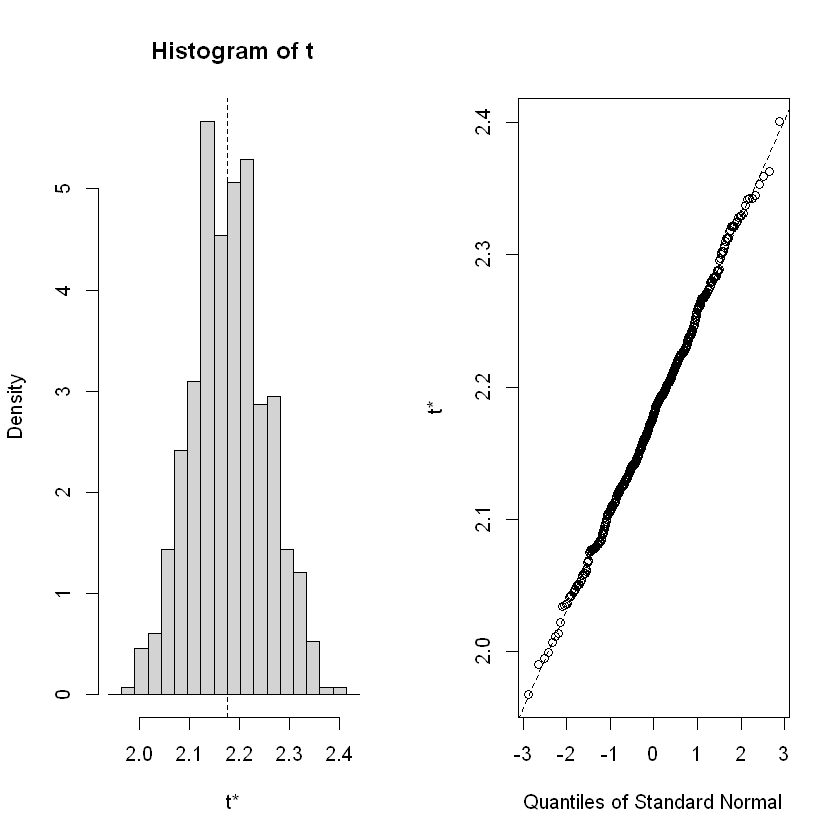

In [28]:
plot(bootcorr)
#Save plot
png('coef_boot.png')
 coef_boot <-plot(bootcorr)
dev.off()

The confidence intervals indicated that all factors were still significant predictors for the happiness score. The histogramm shows the distribution of the estimates of the sampling distribution.

#### Conclusions

The analysis of the correlation matrix and VIF presented no presence of multicollinearity of the six factors. There was a strong correlation of the factors GDP and Life, but this was according to the VIF not a concern of collinearity in the dataset. Multiple linear regression, stepwise regression and the bootstrap methods indicated all six factors to significantly predict the happiness score. The effect was large for the factor GDP, medium for Freedom and small for Support, Life, Corruption and Generosity. 

#### References

* Field, A., Miles, J., & Field, Z. (2012). Discovering Statistics Using R. SAGE Publications Ltd.
* Helliwell, J. F., Layard, R., & Sachs, J. (2012). World Happiness Report. In Sustainable Development Solutions Network. https://doi.org/10.1007/978-3-319-74336-3_371-1
* Helliwell, J. F., Layard, R., & Sachs, J. (2019). World Happiness Report. In Sustainable Development Solutions Network. 
* van den Berg, R. G. (n. d.). Effect Size in Statistics - The Ultimate Guide. SPSS Tutorials. Abgerufen am 5. Juni 2021, von https://www.spss-tutorials.com/effect-size/
* Walther, B. (2021, 21. April). Multikollinearität in R erkennen. Björn Walther. https://bjoernwalther.com/multikollinearitaet-in-r-erkennen/